In [28]:
#Importing relevant Python libraries and modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#A function for extracting the electrostatic interaction energetic values from .csv files stored within a directory of interest
#Input: a directory of interest, containing electrostatic interaction energy files in .csv format; the number of copies of the tested system
#Output: a dictionary containing all energetic values, with the keys depicting the two interacting agents (typically, an Hfq region and polyphosphate/DNA) and the values constituting the interaction energies
def get_file_name_components(dir, copy_nums):
    
    #Storing all .csv energy files and defining the output dictionary
    file_list = os.listdir(dir)
    file_list_csv_only = [x for x in file_list if x.endswith('.csv')]
    output_dict = {}

    #Running on each energy file and extracting the energy values, storing them with the relevant key in the output dictionary
    for file in file_list_csv_only:
        first_split = file.split('_')
        last_split_term = first_split[-1]
        copy_serial = last_split_term.split('.')[0]
        curr_key = first_split[0] + '-' + first_split[1]
        file_df = pd.read_csv(dir + file, sep = '\t')
        file_df.columns = ['Energy']
        if int(copy_serial) in copy_nums:
            if curr_key in output_dict:
                output_dict[curr_key].append(file_df)
            else:
                output_dict[curr_key] = [file_df]

    #Returning the output dictionary
    return output_dict

#Defining the directories containing the energy files of the relevant CG system
origin_dir_PolyP_Hfq_DNA = '' #'../CG_Hfq_PolyP_DNA_Energy_Files/'###PASTE THE DIRECTORY OF HFQ-POLYP-DNA ENERGY FILES HERE
origin_dir_Hfq_DNA = '' ###PASTE THE DIRECTORY OF HFQ-DNA ENERGY FILES HERE
origin_dir_PolyP_Hfq = '' ###PASTE THE DIRECTORY OF HFQ-POLYP ENERGY FILES HERE
PolyP_Hfq_DNA_copies = [2, 3, 4, 5, 8, 9, 10, 11]; Hfq_DNA_copies = [1, 2, 3, 4]; PolyP_Hfq_copies = [1, 2, 3] #For Hfq, PolyP and DNA simulations - copies 1, 6 and 7 were excluded due to technical issues

#Extracting the energy values of each system to a corresponding output dictionary
PolyP_Hfq_DNA_dfs_dict = get_file_name_components(origin_dir_PolyP_Hfq_DNA, PolyP_Hfq_DNA_copies)
Hfq_DNA_dfs_dict = get_file_name_components(origin_dir_Hfq_DNA, Hfq_DNA_copies)
PolyP_Hfq_dfs_dict = get_file_name_components(origin_dir_PolyP_Hfq, PolyP_Hfq_copies)

In [30]:
#Defining all keys from all systems, namely all pairs of interacting agents (typically, an Hfq region and polyphosphate/DNA)
all_keys = [key for key in (list(PolyP_Hfq_DNA_dfs_dict.keys()) + list(Hfq_DNA_dfs_dict.keys()) + list(PolyP_Hfq_dfs_dict.keys()))]
all_keys_set = list(set(all_keys))

In [31]:
#Filtering out first 10% energetic values of all systems for proper energetic sampling
filter_thresh = 1000
dicts = [PolyP_Hfq_DNA_dfs_dict, Hfq_DNA_dfs_dict, PolyP_Hfq_dfs_dict]
unified_dicts = [{}, {}, {}]
for key in all_keys_set:
    for i_d, d in enumerate(dicts):
        if key in d:
            curr_dfs_list = d[key]
            curr_unified_df = pd.DataFrame(columns = ['Energy'])
            for df in curr_dfs_list:
                filtered_df = df.copy().iloc[filter_thresh:, :].reset_index()
                curr_unified_df = pd.concat([curr_unified_df, filtered_df], axis = 0, ignore_index = True)
            unified_dicts[i_d][key] = curr_unified_df

/tmp/ipykernel_254802/3567131484.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  curr_unified_df = pd.concat([curr_unified_df, filtered_df], axis = 0, ignore_index = True)
/tmp/ipykernel_254802/3567131484.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  curr_unified_df = pd.concat([curr_unified_df, filtered_df], axis = 0, ignore_index = True)
/tmp/ipykernel_254802/3567131484.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fu

In [32]:
#Defining parameters relevant for calculating electrostatic Debye-Huckle energetic term
K_coulomb = 332 #kcal/mol*e^2
ionic_strength = 0.02
ref_dielectric_constant = 78.5
dielectric_constant = 70
ionic_radius = 1.4 #A
screening_factor = 0.33 * (ref_dielectric_constant / dielectric_constant) * np.sqrt(ionic_strength) #1/A
salt_dependent_coefficient = (np.e ** (screening_factor * ionic_radius)) / (1 + (screening_factor * ionic_radius))

#Getting a scaling factor to multiply by the raw energy values for getting correct units (kcal/mol)
factor_to_multiply_by = K_coulomb * salt_dependent_coefficient * (10 ** 10)

/tmp/ipykernel_254802/925087747.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax = ax, x = unified_dicts[k][first_key]['Energy'] * factor_to_multiply_by, y = (unified_dicts[k][second_key]['Energy'] + unified_dicts[k][additional_key]['Energy']) * factor_to_multiply_by, log_scale = False, shade = True, cbar = True, color = 'lightskyblue', labels = titles[k], alpha = 1)
/home_b/yoav/.local/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'labels'
  cset = contour_func(
/tmp/ipykernel_254802/925087747.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax = ax, x = unified_dicts[k][first_key]['Energy'] * factor_to_multiply_by, y = (unified_dicts[k][second_key]['Energy']

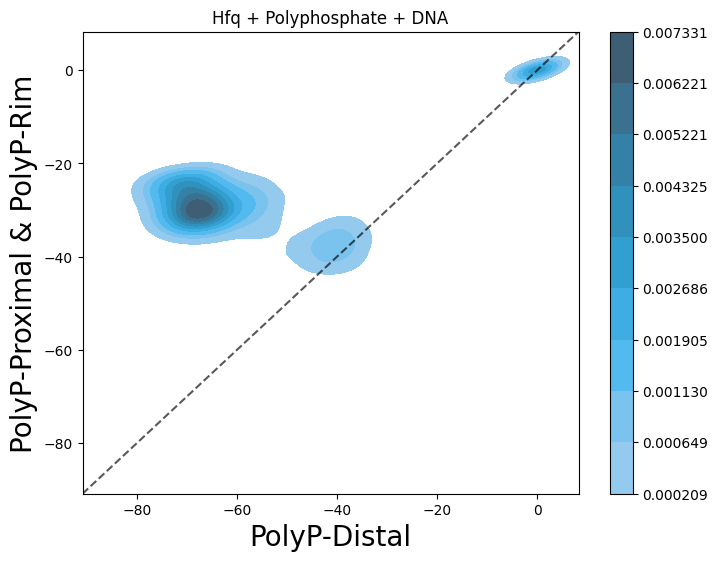

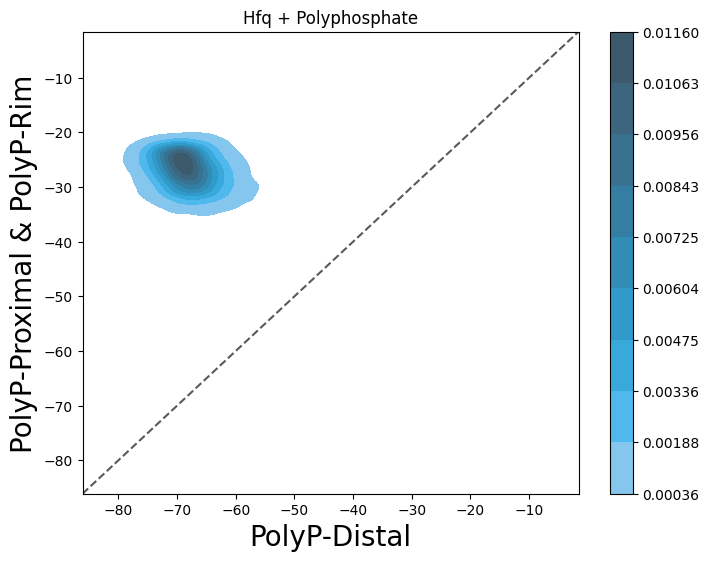

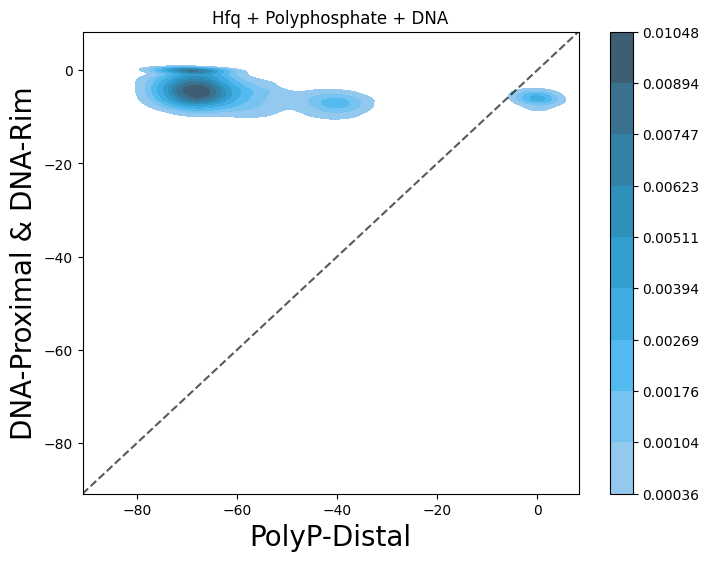

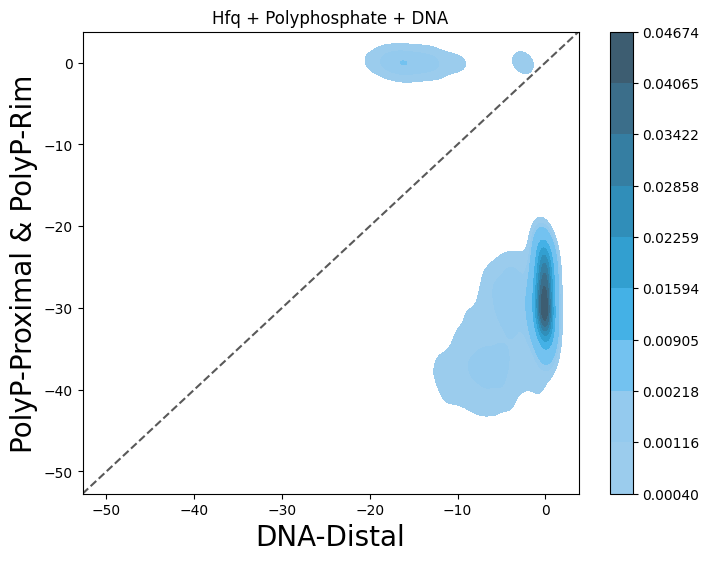

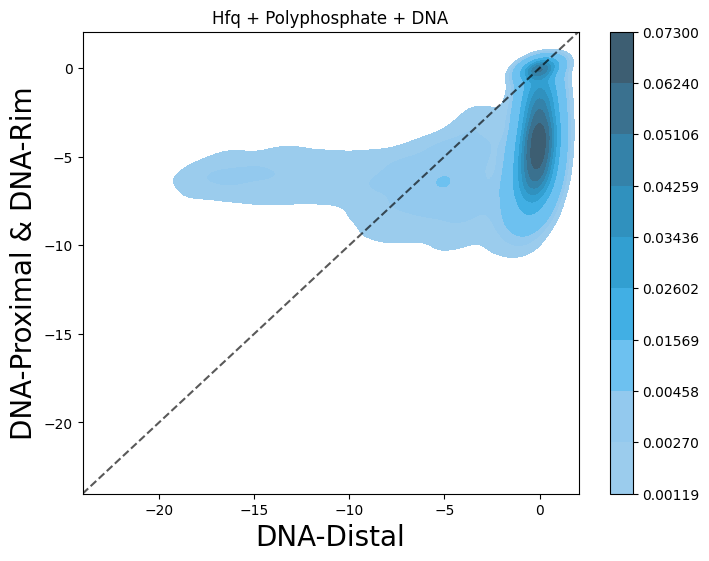

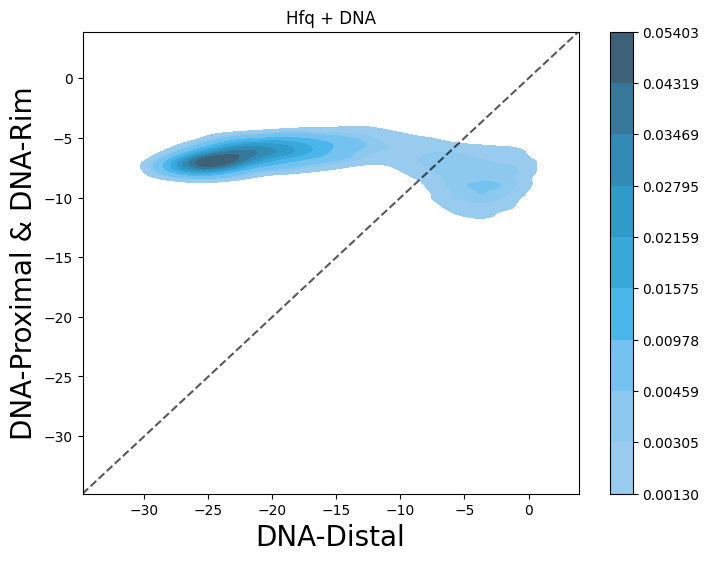

In [33]:
#Generating 2D KDE plots of electrostatic interaction energies, comparing each relevant pair of interacting agents with another (relevant, in that case, means the interaction of the distal and proximal Hfq's faces with polyphosphate or DNA)

#Getting the relevant pairs of interacting agents for each system type, while unifying the lateral (rim) and proximal faces
smaller_keys_set = ['PolyP-Distal', 'PolyP-Proximal', 'DNA-Distal', 'DNA-Proximal']
titles = ['Hfq + Polyphosphate + DNA', 'Hfq + DNA', 'Hfq + Polyphosphate']
for i_first_key in range(0, len(smaller_keys_set) - 1, 2):
    for i_second_key in range(1, len(smaller_keys_set), 2):
        first_key = smaller_keys_set[i_first_key]
        second_key = smaller_keys_set[i_second_key]

        if second_key == 'PolyP-Proximal':
            additional_key = 'PolyP-Rim'
        elif second_key == 'DNA-Proximal':
            additional_key = 'DNA-Rim'

        #For each comparison of the two relevant pairs, producing the 2D KDE plot as PDF file and saving it
        for k in range(len(unified_dicts)):
            if (first_key in list(unified_dicts[k].keys())) and (second_key in list(unified_dicts[k].keys())):
                if (len(np.unique(unified_dicts[k][first_key]['Energy'])) > 1) and (len(np.unique(unified_dicts[k][second_key]['Energy'])) > 1):
                    plt.rcParams['pdf.fonttype'] = 42
                    fig, ax = plt.subplots(figsize = (8, 6))
                    sns.kdeplot(ax = ax, x = unified_dicts[k][first_key]['Energy'] * factor_to_multiply_by, y = (unified_dicts[k][second_key]['Energy'] + unified_dicts[k][additional_key]['Energy']) * factor_to_multiply_by, log_scale = False, shade = True, cbar = True, color = 'lightskyblue', labels = titles[k], alpha = 1)
                    ax.set_xlabel(first_key, fontsize = 20)
                    ax.set_ylabel(second_key + ' & ' + additional_key, fontsize = 20)
                    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
                    ax.set_xlim(lims)
                    ax.set_ylim(lims)
                    ax.set_title(titles[k])
                    ax.plot(lims, lims, '--k', zorder = 1, alpha = 0.65)
                    fig.savefig('Uploaded_KDE_Plot_2D_scale_corrected_unified_proximal_rim_' + first_key + '&' + second_key + '_' + titles[k] + '.pdf', format = 'pdf')

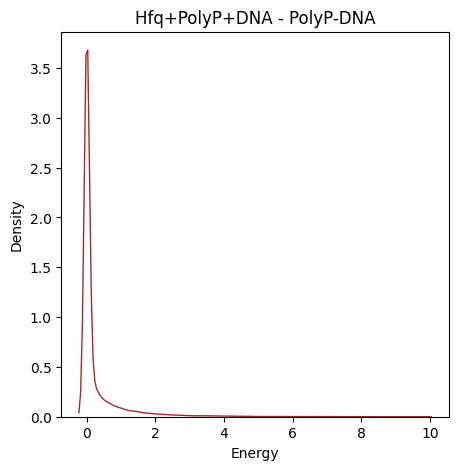

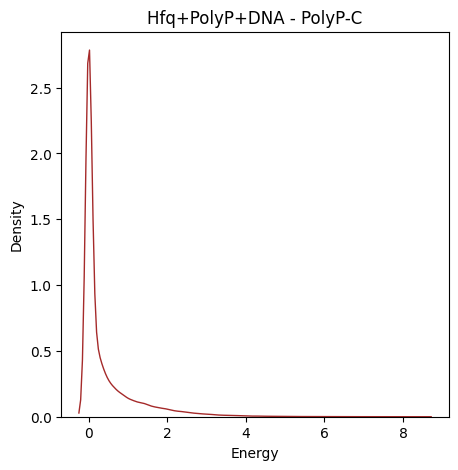

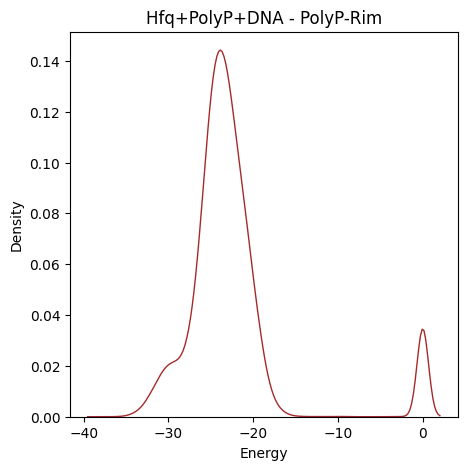

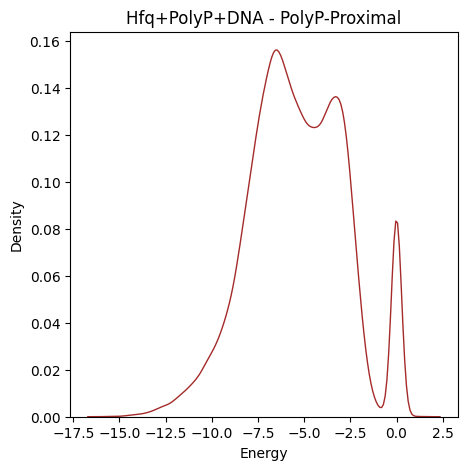

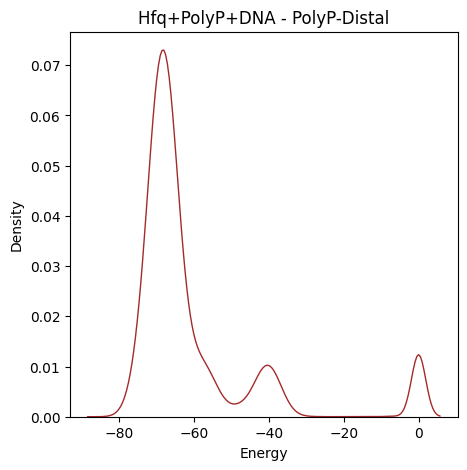

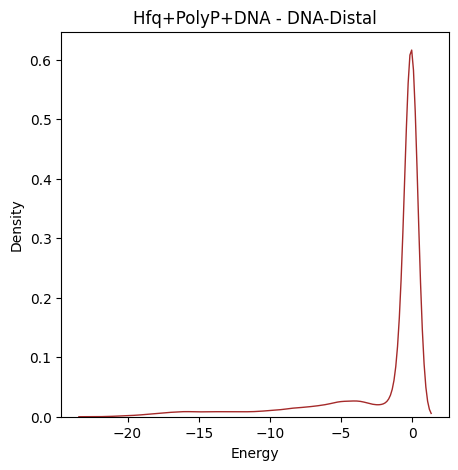

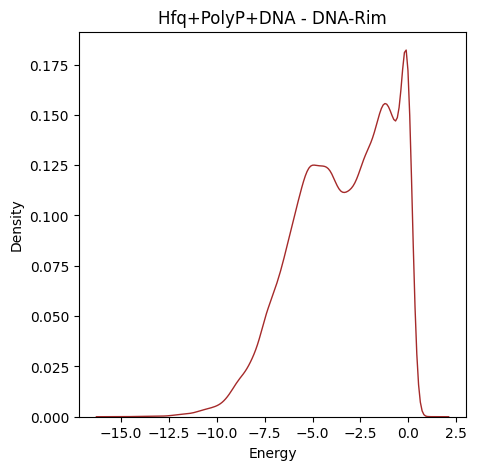

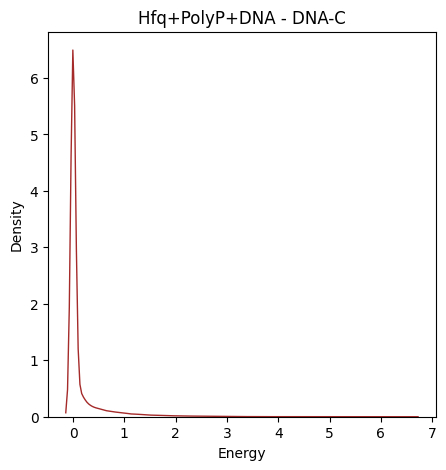

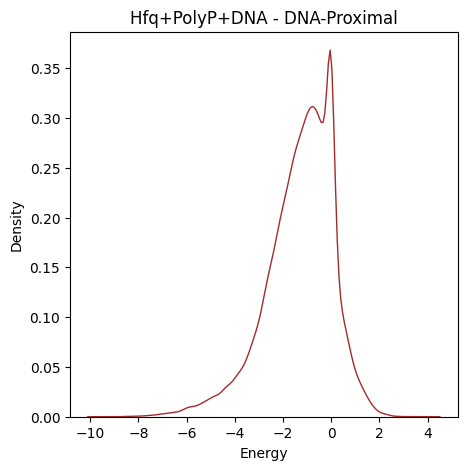

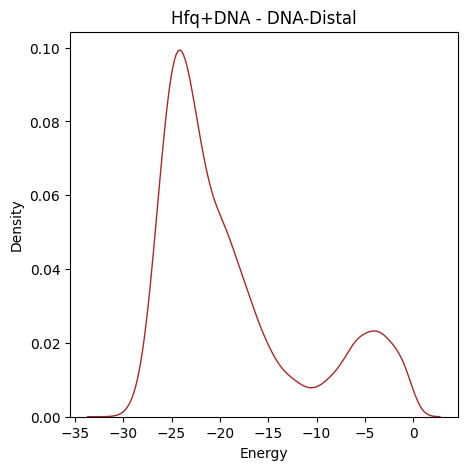

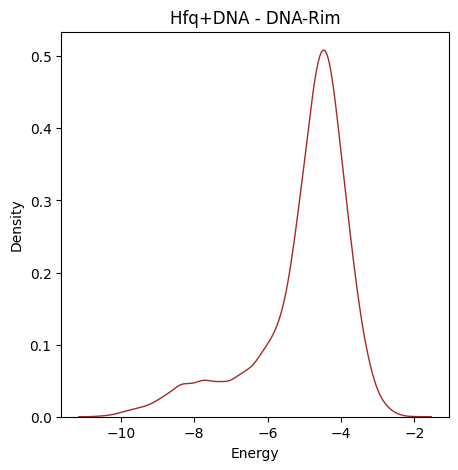

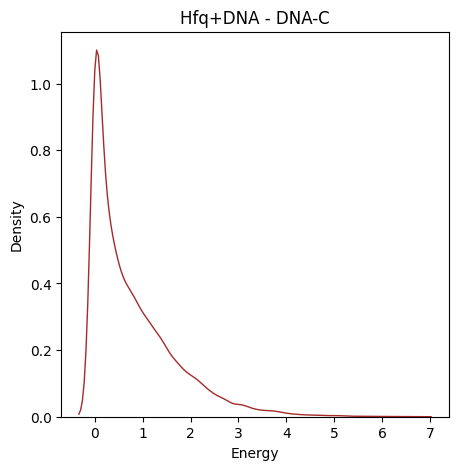

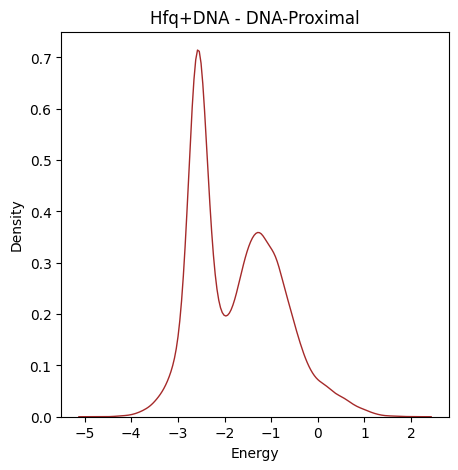

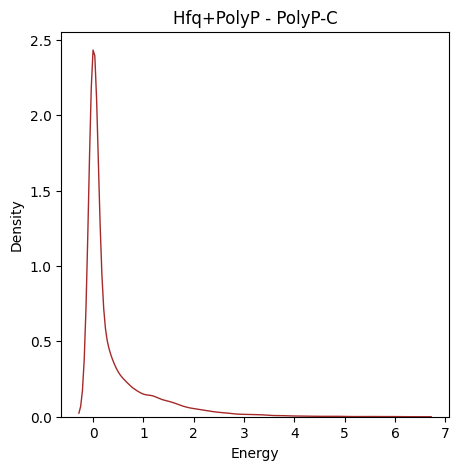

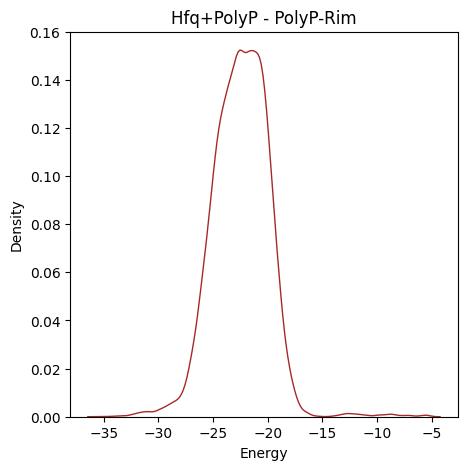

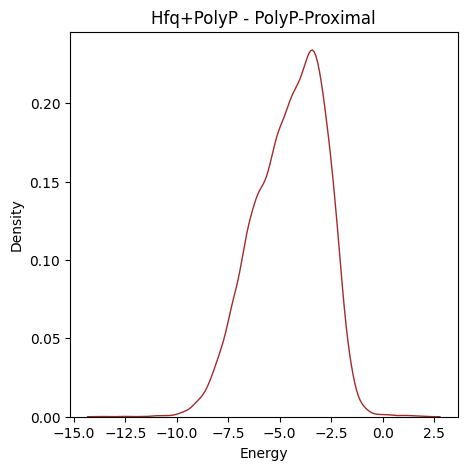

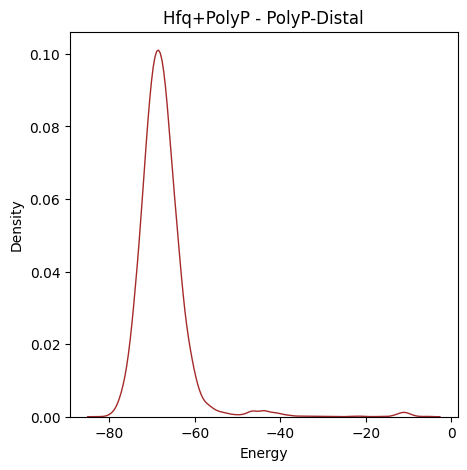

In [9]:
#Generating 1D KDE plots of electrostatic interaction energies for each pair of interacting agents, of each system of interest
dict_names = ['Hfq+PolyP+DNA', 'Hfq+DNA', 'Hfq+PolyP']
for i_dict, curr_dict in enumerate(unified_dicts):
    curr_keys = list(curr_dict.keys())
    for curr_key in curr_keys:
        plt.rcParams['pdf.fonttype'] = 42
        fig, ax = plt.subplots(figsize = (5, 5))
        sns.kdeplot(curr_dict[curr_key].copy()['Energy'] * factor_to_multiply_by, c = 'brown', linewidth = 1)
        ax.set_title(dict_names[i_dict] + ' - ' + curr_key)
        fig.savefig('Uploaded_CG_1_Hfq_KDE_Plot_' + dict_names[i_dict] + '_' + curr_key + '.pdf', format = 'pdf')